<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ALIGNNFF_EV_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alignn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10


100%|██████████| 15.0M/15.0M [00:01<00:00, 10.8MiB/s]


model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10


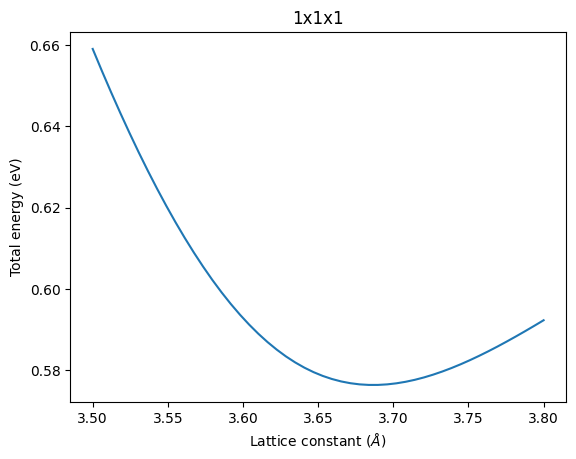

In [3]:
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path,wt10_path
model_path = wt10_path() #default_path()
calc = AlignnAtomwiseCalculator(path=model_path)

from ase import Atom, Atoms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
lattice_params = np.linspace(3.5, 3.8)
fcc_energies = []
ready = True
for a in lattice_params:
    atoms = Atoms([Atom('Cu', (0, 0, 0))],
                  cell=0.5 * a * np.array([[1.0, 1.0, 0.0],
                                           [0.0, 1.0, 1.0],
                                           [1.0, 0.0, 1.0]]),
                 pbc=True)

    atoms.set_tags(np.ones(len(atoms)))
    atoms.calc = calc
    e = atoms.get_potential_energy()
    fcc_energies.append(e)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(lattice_params, fcc_energies)
plt.title('1x1x1')
plt.xlabel('Lattice constant ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.show()

In [5]:
%%time
from jarvis.analysis.structure.spacegroup import Spacegroup3D
from jarvis.db.figshare import data,get_jid_data
from jarvis.core.atoms import Atoms
from alignn.ff.ff import default_path,ev_curve,wt01_path
model_path=wt01_path()#default_path()

print ('model_path',model_path)
#Si
si=['JVASP-1002','JVASP-91933','JVASP-25369','JVASP-25368']
nmsi=['DiamondCubic','X','X','X']
on_relaxed_struct=True
#dft_3d=data('dft_3d')
memsi=[]
for i,j in zip(si,nmsi):
#     if i['jid'] in : #alpha-QTZ, beta-QTZ, alpha-Trid, beta-Trid,alpha-Cryst,beta-cryst ,coesite
        #try:

            dat=get_jid_data(jid=i,dataset='dft_3d')
            atoms=Spacegroup3D(Atoms.from_dict(dat['atoms'])).conventional_standard_structure
            print()
            print(dat['jid'],j,dat['bulk_modulus_kv'],atoms.num_atoms)
            x = ev_curve(atoms,model_path=model_path, on_relaxed_struct=on_relaxed_struct)
            info={}
            info['data']=x
            info['jid']=i
            info['atoms']=atoms
            memsi.append(info)

        #except :
        #    pass
#MoS2

mote2=['JVASP-28733','JVASP-28413','JVASP-58505']
nmmote2=['2H','1T','cubic']
memmote2=[]
for i,j in zip(mote2,nmmote2):
#     if i['jid'] in : #alpha-QTZ, beta-QTZ, alpha-Trid, beta-Trid,alpha-Cryst,beta-cryst ,coesite
        #try:

            dat=get_jid_data(jid=i,dataset='dft_3d')
            atoms=Spacegroup3D(Atoms.from_dict(dat['atoms'])).conventional_standard_structure
            print()
            print(dat['jid'],j,dat['bulk_modulus_kv'],atoms.num_atoms)
            x = ev_curve(atoms,model_path=model_path, on_relaxed_struct=on_relaxed_struct)
            info={}
            info['data']=x
            info['jid']=i
            info['atoms']=atoms
            memmote2.append(info)

        #except :
        #    pass
#Ni3Al

ni3al=['JVASP-14971','JVASP-99749','JVASP-11979']
nmni3al=['L12','Hex.','FCC']

#dft_3d=data('dft_3d')
memni3al=[]
for i,j in zip(ni3al,nmni3al):
#     if i['jid'] in : #alpha-QTZ, beta-QTZ, alpha-Trid, beta-Trid,alpha-Cryst,beta-cryst ,coesite
        #try:

            dat=get_jid_data(jid=i,dataset='dft_3d')
            atoms=Spacegroup3D(Atoms.from_dict(dat['atoms'])).conventional_standard_structure
            print()
            print(dat['jid'],j,dat['bulk_modulus_kv'],atoms.num_atoms)
            x = ev_curve(atoms,model_path=model_path, on_relaxed_struct=on_relaxed_struct)
            info={}
            info['data']=x
            info['jid']=i
            info['atoms']=atoms
            memni3al.append(info)

        #except :
        #    pass
#SiO2
sio2=['JVASP-58349', 'JVASP-34674','JVASP-34656']
names_sio2=["alpha-QTZ",  "alpha-Trid", "alpha-Cryst"]

mem=[]
#for i,j in zip(['JVASP-58349', 'JVASP-58345','JVASP-34674','JVASP-58354','JVASP-34656','JVASP-58394','JVASP-34733','JVASP-58348'],["alpha-QTZ", "beta-QTZ", "alpha-Trid", "beta-Trid","alpha-Cryst","beta-cryst","coesite","stishovite"]):
#     if i['jid'] in : #alpha-QTZ, beta-QTZ, alpha-Trid, beta-Trid,alpha-Cryst,beta-cryst ,coesite
        #try:
for i,j in zip(sio2,names_sio2):
            dat=get_jid_data(jid=i,dataset='dft_3d')
            atoms=Atoms.from_dict(dat['atoms'])
            print()
            print(dat['jid'],j,dat['bulk_modulus_kv'],atoms.num_atoms)
            x = ev_curve(atoms,model_path=model_path, on_relaxed_struct=on_relaxed_struct)
            info={}
            info['data']=x
            info['jid']=i
            info['atoms']=atoms
            mem.append(info)

        #except :
        #    pass

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt01


100%|██████████| 15.0M/15.0M [00:01<00:00, 11.2MiB/s]


model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt01
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt01
Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:02<00:00, 16.1MiB/s]


Loading the zipfile...
Loading completed.

JVASP-1002 DiamondCubic 87.27 8
OPTIMIZATION
a= 5.494 Ang b= 5.494 Ang c= 5.494 Ang Volume= 165.798 amu/a3 PE=-32.93991 eV KE= 0.00000 eV T= 0.000 K 
a= 5.479 Ang b= 5.479 Ang c= 5.479 Ang Volume= 164.485 amu/a3 PE=-33.18951 eV KE= 0.00000 eV T= 0.000 K 
a= 5.437 Ang b= 5.437 Ang c= 5.437 Ang Volume= 160.701 amu/a3 PE=-33.25315 eV KE= 0.00000 eV T= 0.000 K 
a= 5.392 Ang b= 5.383 Ang c= 5.386 Ang Volume= 156.313 amu/a3 PE=-33.34068 eV KE= 0.00000 eV T= 0.000 K 
a= 5.323 Ang b= 5.293 Ang c= 5.300 Ang Volume= 149.349 amu/a3 PE=-33.19143 eV KE= 0.00000 eV T= 0.000 K 
a= 5.333 Ang b= 5.302 Ang c= 5.310 Ang Volume= 150.150 amu/a3 PE=-33.22425 eV KE= 0.00000 eV T= 0.000 K 
a= 5.350 Ang b= 5.318 Ang c= 5.326 Ang Volume= 151.533 amu/a3 PE=-33.24577 eV KE= 0.00000 eV T= 0.000 K 
a= 5.372 Ang b= 5.335 Ang c= 5.344 Ang Volume= 153.157 amu/a3 PE=-33.26462 eV KE= 0.00000 eV T= 0.000 K 
a= 5.403 Ang b= 5.359 Ang c= 5.368 Ang Volume= 155.423 amu/a3 PE=-33.345

JVASP-1002 -4.174917221069336 Diam.Cub.
JVASP-91933 -4.066973686218262 Mono.
JVASP-25369 -4.021427631378174 Cubic2
JVASP-25368 -4.057082176208496 Cubic3
JVASP-58349 -6.433718681335449 alpha-QTZ
JVASP-34674 -6.420201301574707 alpha-Trid
JVASP-34656 -6.427004814147949 alpha-Cryst
JVASP-14971 -2.036163806915283 L12
JVASP-99749 -2.0329933166503906 Hex.
JVASP-11979 -1.9778053760528564 FCC
JVASP-28733 -5.309932231903076 2H
JVASP-28413 -5.26743745803833 1T
JVASP-58505 -5.101556301116943 cubic


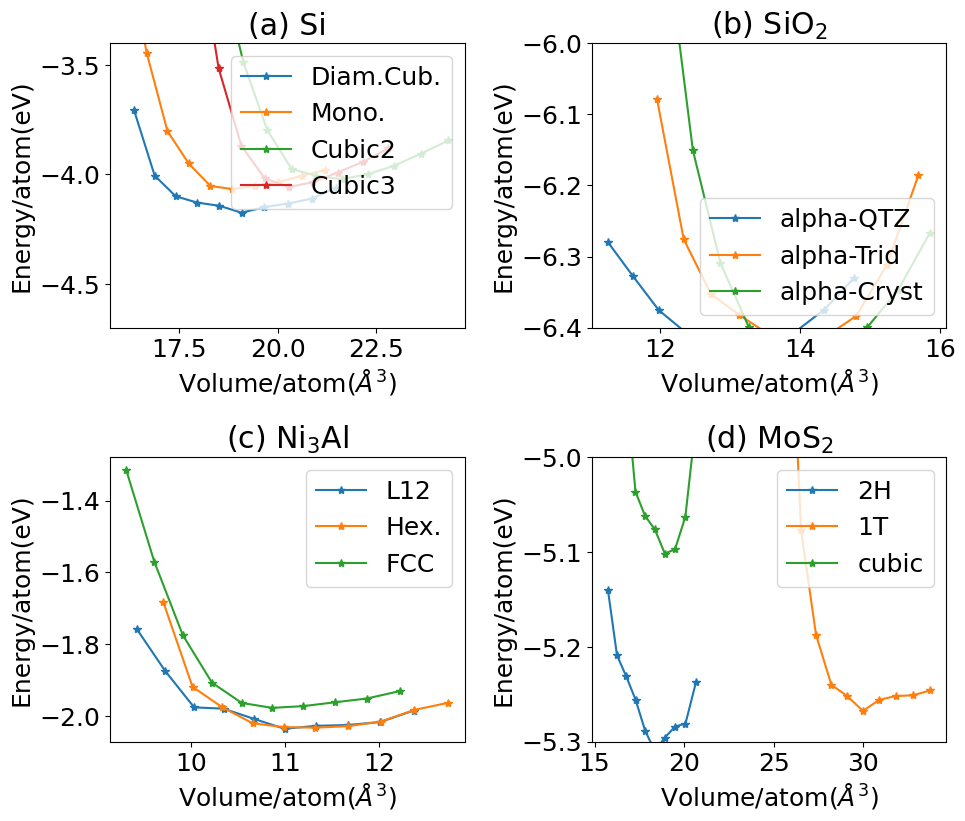

In [6]:

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,12))
the_grid = GridSpec(3,2)
plt.clf()
plt.subplot(the_grid[0, 0])
plt.title('(a) Si')
nmsi=['Diam.Cub.','Mono.','Cubic2','Cubic3']
for i,j in zip(memsi,nmsi):
  #if j not in ['Cubic3']:
    energies=np.array(i['data'][2].e)/i['atoms'].num_atoms
    vols=i['data'][2].v/i['atoms'].num_atoms
    print(i['jid'],min(i['data'][2].e)/(i['atoms'].num_atoms),j)
    plt.plot(vols,energies,'-*',label=j)
plt.legend(loc='upper right')
plt.ylim([-4.7,-3.4])
plt.xlabel('Volume/atom($\AA^3$)')
plt.ylabel('Energy/atom(eV)')
#plt.xlim(12,30)


plt.subplot(the_grid[0, 1])
plt.title('(b) SiO$_2$')
nm=['$\\alpha$-Qtz', 'beta-QTZ', '$\\alpha$-Trid', 'beta-Trid','$\\alpha$-Cryst','$\\beta$-Cryst','coesite',"stishovite"]
nm=["alpha-QTZ",  "alpha-Trid", "alpha-Cryst"]
for i,j in zip(mem,nm):
  #if j not in ['beta-QTZ','coesite',"stishovite",'beta-Trid']:
    energies=np.array(i['data'][2].e)/i['atoms'].num_atoms
    vols=i['data'][2].v/i['atoms'].num_atoms
    print(i['jid'],min(i['data'][2].e)/(i['atoms'].num_atoms),j)
    plt.plot(vols,energies,'-*',label=j)
plt.legend(loc='lower right')
plt.ylim([-6.4,-6])
plt.xlabel('Volume/atom($\AA^3$)')
plt.ylabel('Energy/atom(eV)')

plt.subplot(the_grid[1, 0])
plt.title('(c) Ni$_3$Al')
for i,j in zip(memni3al,nmni3al):
    energies=np.array(i['data'][2].e)/i['atoms'].num_atoms
    vols=i['data'][2].v/i['atoms'].num_atoms
    print(i['jid'],min(i['data'][2].e)/(i['atoms'].num_atoms),j)
    plt.plot(vols,energies,'-*',label=j)
plt.legend(loc='upper right')
#plt.ylim([-5.3,-5])
plt.xlabel('Volume/atom($\AA^3$)')
plt.ylabel('Energy/atom(eV)')

plt.subplot(the_grid[1, 1])
plt.title('(d) MoS$_2$')
for i,j in zip(memmote2,nmmote2):
    energies=np.array(i['data'][2].e)/i['atoms'].num_atoms
    vols=i['data'][2].v/i['atoms'].num_atoms
    print(i['jid'],min(i['data'][2].e)/(i['atoms'].num_atoms),j)
    plt.plot(vols,energies,'-*',label=j)
plt.legend(loc='upper right')
plt.ylim([-5.3,-5])
plt.xlabel('Volume/atom($\AA^3$)')
plt.ylabel('Energy/atom(eV)')


plt.tight_layout()

In [ ]:
%%time
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
#plt.switch_backend('agg')
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import get_jid_data
from jarvis.analysis.structure.spacegroup import Spacegroup3D
import numpy as np
from ase.calculators.eam import EAM
from ase.eos import EquationOfState
from alignn.ff.ff import (
    default_path,
    ev_curve,
    surface_energy,
    vacancy_formation,
    ForceField,
    wt10_path

)


model_path = wt10_path() #default_path()
print ('model_path',model_path)

do_gpaw=False

def get_gpaw_energy(ase_atoms=None,k=2,cutoff=300,name='x'):
    if not do_gpaw:
        return 0.0
    from gpaw import GPAW, PW
    #

    calc = GPAW(mode=PW(cutoff),       # cutoff
                kpts=(k, k, k),     # k-points
                txt=name + '.txt')  # output file
    bulk=ase_atoms #.ase_converter()
    bulk.calc = calc

    energy = bulk.get_potential_energy()
    return energy


#Aluminum
# mishin = EAM(potential='Al99.eam.alloy')
mishin = EAM(potential='Mishin-Ni-Al-Co-2013.eam.alloy')

dx=np.arange(-0.1, 0.1, 0.01)
dx_gpaw=np.arange(-0.1, 0.1, 0.05)

# al = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-816',dataset="dft_3d")['atoms'])).conventional_standard_structure

# x_al, y_al, eos, kv = ev_curve(al,model_path=model_path,dx=dx)

# ens_al = []
# vol_al = []
# ens_al_gpaw = []
# vol_al_gpaw = []
# for ii,i in enumerate(dx):
#     s1 = al.strain_atoms(i)
#     s1_ase=s1.ase_converter()
#     s1_ase.calc = mishin
#     pe = s1_ase.get_potential_energy()
#     ens_al.append(pe/s1.num_atoms)
#     vol_al.append(s1.volume/s1.num_atoms)
#     if ii in [0,5,10,15,19]:
#         en = get_gpaw_energy(s1_ase)
#         ens_al_gpaw.append(en)
#         vol_al_gpaw.append(s1.volume/s1.num_atoms)
#         print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
#         print(i,s1.composition.reduced_formula,s1.volume,pe,en)


############### METALLIC ################################################
#ni3al
ni3al = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-14971',dataset="dft_3d")['atoms'])).conventional_standard_structure
x_ni3al, y_ni3al, eos, kv = ev_curve(ni3al,model_path=model_path,dx=dx)

ens_ni3al = []
vol_ni3al = []
ens_ni3al_gpaw = []
vol_ni3al_gpaw = []
for ii,i in enumerate(dx):
    s1 = ni3al.strain_atoms(i)
    s1_ase=s1.ase_converter()
    s1_ase.calc = mishin
    pe = s1_ase.get_potential_energy()
    ens_ni3al.append(pe/s1.num_atoms)
    vol_ni3al.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_ni3al_gpaw.append(en)
        vol_ni3al_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
        print(i,s1.composition.reduced_formula, s1.volume,pe)

#alconi
alconi = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-108163',dataset="dft_3d")['atoms'])).conventional_standard_structure
x_alconi, y_alconi, eos, kv = ev_curve(alconi,model_path=model_path,dx=dx)

ens_alconi = []
vol_alconi = []
ens_alconi_gpaw = []
vol_alconi_gpaw = []
for ii,i in enumerate(dx):
    s1 = alconi.strain_atoms(i)
    s1_ase=s1.ase_converter()
    s1_ase.calc = mishin
    pe = s1_ase.get_potential_energy()
    ens_alconi.append(pe/s1.num_atoms)
    vol_alconi.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_alconi_gpaw.append(en)
        vol_alconi_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
        print(i,s1.composition.reduced_formula,s1.volume,pe)




farkas = EAM(potential='FeNiCrCoCu-with-ZBL.eam.alloy')
#Feconicr
#dx=np.arange(-0.1, 0.1, 0.01)
#feconi = Spacegroup3D(Atoms.from_poscar('POSCAR-FeCoNiCr-211-Cu.vasp')).conventional_standard_structure
feconicr = Spacegroup3D(Atoms.from_poscar('POSCAR-FeCoNiCr.vasp')).conventional_standard_structure
x_feconicr, y_feconicr, eos, kv = ev_curve(feconicr,model_path=model_path,dx=dx)

ens_feconicr = []
vol_feconicr = []
ens_feconicr_gpaw = []
vol_feconicr_gpaw = []
for ii,i in enumerate(dx):
    s1 = feconicr.strain_atoms(i)
    s1_ase=s1.ase_converter()
    s1_ase.calc = farkas
    pe = s1_ase.get_potential_energy()
    ens_feconicr.append(pe/s1.num_atoms)
    vol_feconicr.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_feconicr_gpaw.append(en)
        vol_feconicr_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
        print(i,s1.composition.reduced_formula,s1.volume,pe)


#####################################################################################################################

######################## COVALENT #########################


#SiGe
#dx=np.arange(-0.1, 0.1, 0.01)
feconicrcu = Spacegroup3D(Atoms.from_poscar('POSCAR-FeCoNiCr-211-Cu.vasp')).conventional_standard_structure
feconicrcu = Spacegroup3D(Atoms.from_poscar('POSCAR-FeCoNiCrAl.vasp')).conventional_standard_structure
feconicrcu = Spacegroup3D(Atoms.from_poscar('POSCAR-CrFeCoAl.vasp')).conventional_standard_structure

feconicrcu = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-105410',dataset="dft_3d")['atoms'])).conventional_standard_structure

x_feconicrcu, y_feconicrcu, eos, kv = ev_curve(feconicrcu,model_path=model_path,dx=dx)

#ens_feconicrcu = []
vol_feconicrcu = []
ens_feconicrcu_gpaw = []
vol_feconicrcu_gpaw = []
for ii,i in enumerate(dx):
    s1 = feconicrcu.strain_atoms(i)
    s1_ase=s1.ase_converter()
    #s1_ase.calc = farkas
    #pe = s1_ase.get_potential_energy()
    #ens_feconicrcu.append(pe/s1.num_atoms)
    vol_feconicrcu.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_feconicrcu_gpaw.append(en)
        vol_feconicrcu_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
#     en = get_gpaw_energy(s1_ase)

#     ens_feconicrcu_gpaw.append(en)
        print(i,s1.composition.reduced_formula,s1.volume,pe)


#dx=np.arange(-0.1, 0.1, 0.01)
#ZnH4C4O4
#GaAs
feconicrcual = Spacegroup3D(Atoms.from_poscar('POSCAR-FeCoNiCr-211-Cual.vasp')).conventional_standard_structure
feconicrcual = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-101901',dataset="dft_3d")['atoms'])).conventional_standard_structure
feconicrcual = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-1174',dataset="dft_3d")['atoms'])).conventional_standard_structure

x_feconicrcual, y_feconicrcual, eos, kv = ev_curve(feconicrcual,model_path=model_path,dx=dx)

ens_feconicrcual = []
vol_feconicrcual = []
ens_feconicrcual_gpaw = []
vol_feconicrcual_gpaw = []
for ii,i in enumerate(dx):
    s1 = feconicrcual.strain_atoms(i)
    s1_ase=s1.ase_converter()
    #s1_ase.calc = farkas
    #pe = s1_ase.get_potential_energy()
    #ens_feconicr.append(pe/s1.num_atoms)
    vol_feconicrcual.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_feconicrcual_gpaw.append(en)
        vol_feconicrcual_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)

    #print(i,s1.composition.reduced_formula,s1.volume,pe)



#CuInSe2
al = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-8554',dataset="dft_3d")['atoms'])).conventional_standard_structure

x_al, y_al, eos, kv = ev_curve(al,model_path=model_path,dx=dx)

#ens_al = []
vol_al = []
ens_al_gpaw = []
vol_al_gpaw = []
for ii,i in enumerate(dx):
    s1 = al.strain_atoms(i)
    s1_ase=s1.ase_converter()
    #s1_ase.calc = mishin
    #pe = s1_ase.get_potential_energy()
    #ens_al.append(pe/s1.num_atoms)
    vol_al.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_al_gpaw.append(en)
        vol_al_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
        print(i,s1.composition.reduced_formula,s1.volume,pe,en)

######################################################################

########################Ionic####################
#nacl 23862

si = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-23862',dataset="dft_3d")['atoms'])).conventional_standard_structure
si = (Atoms.from_dict(get_jid_data(jid='JVASP-23862',dataset="dft_3d")['atoms'])) #.conventional_standard_structure

x_si, y_si, eos, kv = ev_curve(si,model_path=model_path,dx=dx)
#ens_si = []
vol_si = []
ens_si_gpaw = []
vol_si_gpaw = []
for ii,i in enumerate(dx):
    s1 = si.strain_atoms(i)
    s1_ase=s1.ase_converter()
    #s1_ase.calc = mishin
    #pe = s1_ase.get_potential_energy()
    #ens_si.append(pe/s1.num_atoms)
    vol_si.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_si_gpaw.append(en)
        vol_si_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
        print(i,s1.composition.reduced_formula, s1.volume)

#mgo
sio2 = Spacegroup3D(Atoms.from_dict(get_jid_data(jid='JVASP-32',dataset="dft_3d")['atoms'])).conventional_standard_structure
sio2 = (Atoms.from_dict(get_jid_data(jid='JVASP-116',dataset="dft_3d")['atoms'])) #.conventional_standard_structure

x_sio2, y_sio2, eos, kv = ev_curve(sio2,model_path=model_path,dx=dx)
#ens_si = []
vol_sio2 = []
ens_sio2_gpaw = []
vol_sio2_gpaw = []
for ii,i in enumerate(dx):
    s1 = sio2.strain_atoms(i)
    s1_ase=s1.ase_converter()
    #s1_ase.calc = mishin
    #pe = s1_ase.get_potential_energy()
    #ens_si.append(pe/s1.num_atoms)
    vol_sio2.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_sio2_gpaw.append(en)
        vol_sio2_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
        print(i,s1.composition.reduced_formula, s1.volume)

#batio3

sion = Atoms.from_dict(get_jid_data(jid='JVASP-8029',dataset="dft_3d")['atoms']) #).conventional_standard_structure
#sion = (Atoms.from_dict(get_jid_data(jid='JVASP-104138',dataset="dft_3d")['atoms'])) #.conventional_standard_structure
#sion = (Atoms.from_dict(get_jid_data(jid='JVASP-2017',dataset="dft_3d")['atoms'])) #.conventional_standard_structure

x_sion, y_sion, eos, kv = ev_curve(sion,model_path=model_path,dx=dx)
#ens_si = []
vol_sion = []
ens_sion_gpaw = []
vol_sion_gpaw = []
for ii,i in enumerate(dx):
    s1 = sion.strain_atoms(i)
    s1_ase=s1.ase_converter()
    #s1_ase.calc = mishin
    #pe = s1_ase.get_potential_energy()
    #ens_si.append(pe/s1.num_atoms)
    vol_sion.append(s1.volume/s1.num_atoms)
    if ii in [0,5,10,15,19]:
        en = get_gpaw_energy(s1_ase)
        ens_sion_gpaw.append(en)
        vol_sion_gpaw.append(s1.volume/s1.num_atoms)
        print('gpaw',i,dx_gpaw,en,s1.volume/s1.num_atoms)
        print(i,s1.composition.reduced_formula, s1.volume)


In [ ]:
the_grid = GridSpec(3,3)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(16,14))
s=60


plt.subplot(the_grid[0,0])
plt.title('(a) $Ni_3Al$') #+ni3al.composition.reduced_formula)
plt.scatter(vol_ni3al,-1*np.array(y_ni3al)/min(y_ni3al),s=s,label='ALIGNN-FF')

plt.scatter(vol_ni3al,-1*np.array(ens_ni3al)/min(ens_ni3al),s=s,label='EAM')
plt.scatter(vol_ni3al_gpaw,-1*np.array(ens_ni3al_gpaw)/min(ens_ni3al_gpaw),s=s,label='GPAW',c='limegreen')
plt.legend()
plt.xlabel('Volume/atom ($\AA^3$)')
plt.ylabel('Scaled energy (eV/atom)')
plt.tight_layout()
#plt.ylabel('Scaled energy/atom')

plt.subplot(the_grid[0,1])
plt.title('(b) $Al_2CoNi$') #+alconi.composition.reduced_formula)
plt.scatter(vol_alconi,-1*np.array(y_alconi)/min(y_alconi),s=s,label='ALIGNN-FF')

plt.scatter(vol_alconi,-1*np.array(ens_alconi)/min(ens_alconi),s=s,label='EAM')
plt.scatter(vol_alconi_gpaw,-1*np.array(ens_alconi_gpaw)/min(ens_alconi_gpaw),s=s,label='GPAW',c='limegreen')
plt.legend()

plt.xlabel('Volume/atom ($\AA^3$)')
plt.tight_layout()


plt.subplot(the_grid[0,2])
plt.title('(c) '+feconicr.composition.reduced_formula)
plt.ylabel('Scaled energy (eV/atom)')
plt.scatter(vol_feconicr,-1*np.array(y_feconicr)/min(y_feconicr),s=s,label='ALIGNN-FF')

plt.scatter(vol_feconicr,-1*np.array(ens_feconicr)/min(ens_feconicr),s=s,label='EAM')
plt.scatter(vol_feconicr_gpaw,-1*np.array(ens_feconicr_gpaw)/min(ens_feconicr_gpaw),s=s,label='GPAW',c='limegreen')
plt.legend()
plt.xlabel('Volume/atom ($\AA^3$)')
plt.tight_layout()

plt.subplot(the_grid[1,0])
plt.title('(d) '+feconicrcu.composition.reduced_formula)
plt.ylabel('Scaled energy (eV/atom)')
plt.scatter(vol_feconicrcu,-1*np.array(y_feconicrcu)/min(y_feconicrcu),s=s,label='ALIGNN-FF')
#plt.scatter(vol_feconicrcu,-1*np.array(ens_feconicrcu)/min(ens_feconicrcu),s=s,label='EAM')
plt.scatter(vol_feconicrcu_gpaw,-1*np.array(ens_feconicrcu_gpaw)/min(ens_feconicrcu_gpaw),s=s,label='GPAW',c='limegreen') #,marker=11)
plt.legend()
plt.xlabel('Volume/atom ($\AA^3$)')
plt.tight_layout()

plt.subplot(the_grid[1,1])
plt.title('(e) '+feconicrcual.composition.reduced_formula)
plt.scatter(vol_feconicrcual,-1*np.array(y_feconicrcual)/min(y_feconicrcual),s=s,label='ALIGNN-FF')
#plt.scatter(vol_feconicrcual,-1*np.array(ens_feconicrcual)/min(ens_feconicrcual),s=s,label='EAM')
plt.scatter(vol_feconicrcual_gpaw,-1*np.array(ens_feconicrcual_gpaw)/min(ens_feconicrcual_gpaw),s=s,label='GPAW',c='limegreen')
plt.legend()
plt.xlabel('Volume/atom ($\AA^3$)')



plt.subplot(the_grid[2,0])
plt.title('(g) '+si.composition.reduced_formula)
plt.ylabel('Scaled energy (eV/atom)')
plt.scatter(vol_si,-1*np.array(y_si)/min(y_si),s=s,label='ALIGNN-FF')
#plt.scatter(vol_si,-1*np.array(ens_si)/min(ens_si),s=s,label='EAM')
plt.scatter(vol_si_gpaw,-1*np.array(ens_si_gpaw)/min(ens_si_gpaw),s=s,label='GPAW',c='limegreen')
plt.legend()
plt.ylabel('Scaled energy (eV/atom)')
plt.xlabel('Volume/atom ($\AA^3$)')
plt.tight_layout()


plt.subplot(the_grid[1,2])
plt.title('(f) $InCuSe_2$') #+al.composition.reduced_formula)
plt.scatter(vol_al,-1*np.array(y_al)/min(y_al),s=s,label='ALIGNN-FF')
#plt.scatter(vol_al,-1*np.array(ens_al)/min(ens_al),s=s,label='EAM')
plt.scatter(vol_al_gpaw,-1*np.array(ens_al_gpaw)/min(ens_al_gpaw),s=s,label='GPAW',c='limegreen')
plt.legend()
plt.xlabel('Volume/atom ($\AA^3$)')

plt.tight_layout()

plt.subplot(the_grid[2,1])
plt.title('(h) '+sio2.composition.reduced_formula)
plt.scatter(vol_sio2,-1*np.array(y_sio2)/min(y_sio2),s=s,label='ALIGNN-FF')
#plt.scatter(vol_sio2,-1*np.array(ens_sio2)/min(ens_sio2),s=s,label='EAM')
plt.scatter(vol_sio2_gpaw,-1*np.array(ens_sio2_gpaw)/min(ens_sio2_gpaw),s=s,label='GPAW',c='limegreen')
plt.legend()
plt.xlabel('Volume/atom ($\AA^3$)')
plt.tight_layout()

plt.subplot(the_grid[2,2])
plt.title('(i) $BaTiO_3$') #+sion.composition.reduced_formula)
plt.scatter(vol_sion,-1*np.array(y_sion)/min(y_sion),s=s,label='ALIGNN-FF')
#plt.scatter(vol_feconicrcual,-1*np.array(ens_feconicrcual)/min(ens_feconicrcual),s=s,label='EAM')
plt.scatter(vol_sion_gpaw,-1*np.array(ens_sion_gpaw)/min(ens_sion_gpaw),s=s,label='GPAW',c='limegreen')
plt.legend()
plt.xlabel('Volume/atom ($\AA^3$)')

#plt.ylabel('Scaled energy/atom')
plt.tight_layout()
# plt.savefig('ev_eam.pdf')
# plt.close()